In [1]:
library(tidyverse)
library(zoo)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
df <- read_csv("../data/snb-data-rendoblim-en-all-20170502_1430.csv")
df$Date <- as.Date(as.yearmon(df$Date))
head(df)

Parsed with column specification:
cols(
  Date = col_character(),
  D0 = col_character(),
  Value = col_double()
)


Date,D0,Value
1988-01-01,1J,2.887
1988-01-01,2J,3.218
1988-01-01,3J,3.393
1988-01-01,4J,3.554
1988-01-01,5J,3.695
1988-01-01,6J,3.810


In [3]:
tdf = filter(df, D0 == '1J')
head(tdf)

Date,D0,Value
1988-01-01,1J,2.887
1988-02-01,1J,2.638
1988-03-01,1J,2.641
1988-04-01,1J,2.800
1988-05-01,1J,3.191
1988-06-01,1J,3.642


# Line Plots

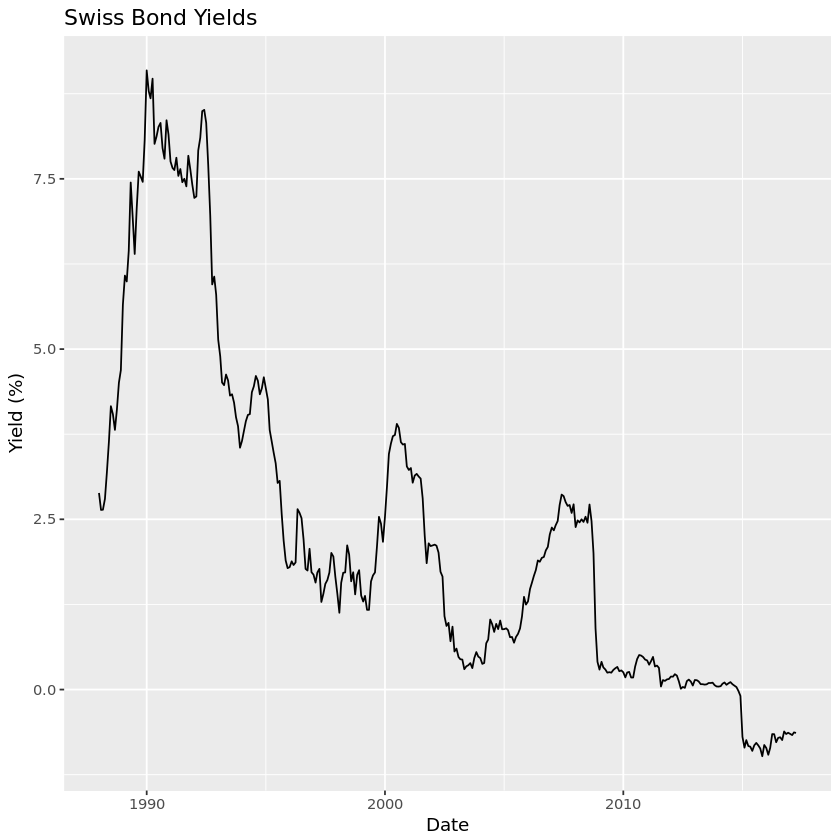

In [4]:
start <- as.Date(unlist(head(tdf, n=1)[,1]))
end <- as.Date(unlist(tail(tdf, n=1)[,1]))
ggplot(data = tdf, mapping = aes(x = Date, y = Value)) + 
    geom_line() + 
    scale_y_continuous("Yield (%)") +
    scale_x_date("Date", limits=c(start, end)) + 
    labs(title="Swiss Bond Yields")

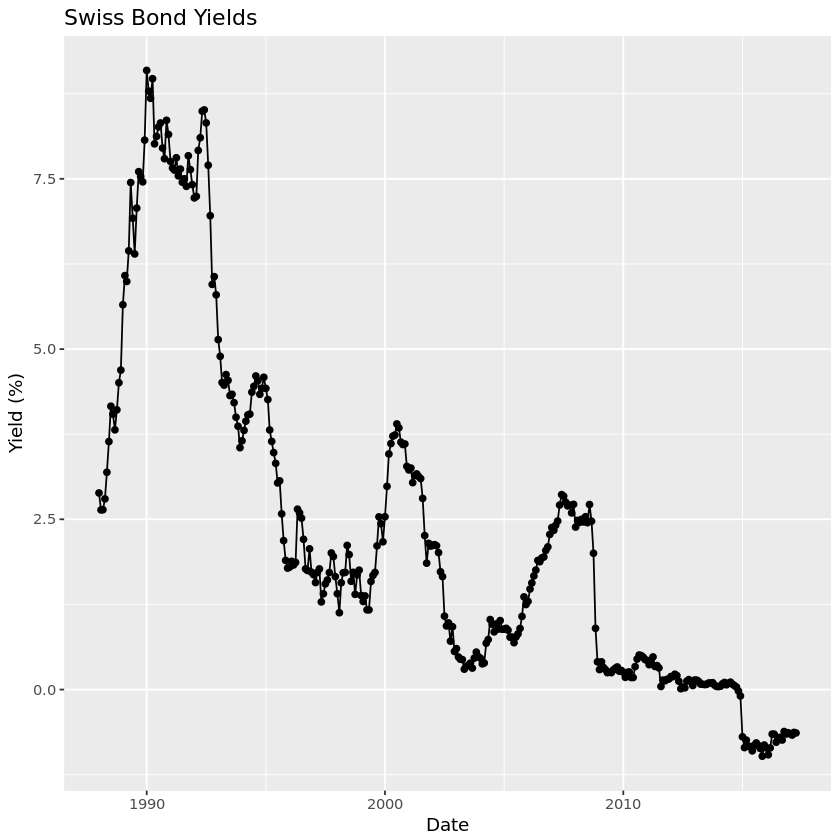

In [5]:
ggplot(data = tdf, mapping = aes(x = Date, y = Value)) + 
    geom_line() + geom_point() + 
    scale_y_continuous("Yield (%)") +
    scale_x_date("Date") + 
    labs(title="Swiss Bond Yields")

# Boxplots

Warning message:
“Removed 119 rows containing non-finite values (stat_boxplot).”

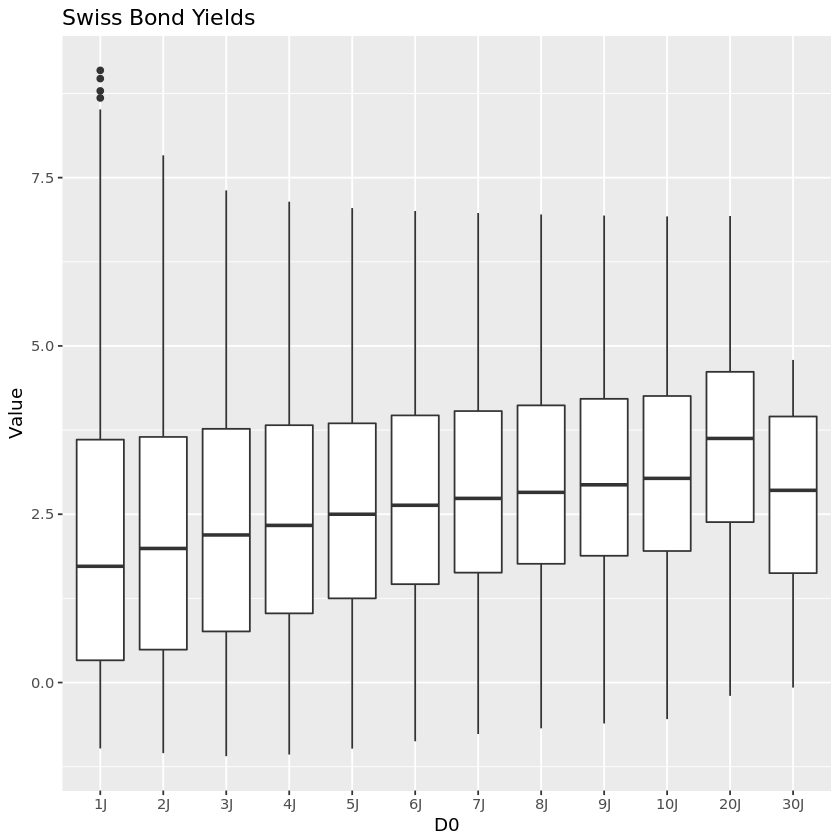

In [6]:
ggplot(data = df, mapping = aes(x = D0, y = Value)) + 
    geom_boxplot() + 
    scale_x_discrete(limits=c("1J", "2J", "3J", "4J", "5J", "6J", "7J", "8J", "9J", "10J", "20J", "30J")) + 
    labs(title="Swiss Bond Yields")

Warning message:
“Removed 119 rows containing non-finite values (stat_boxplot).”

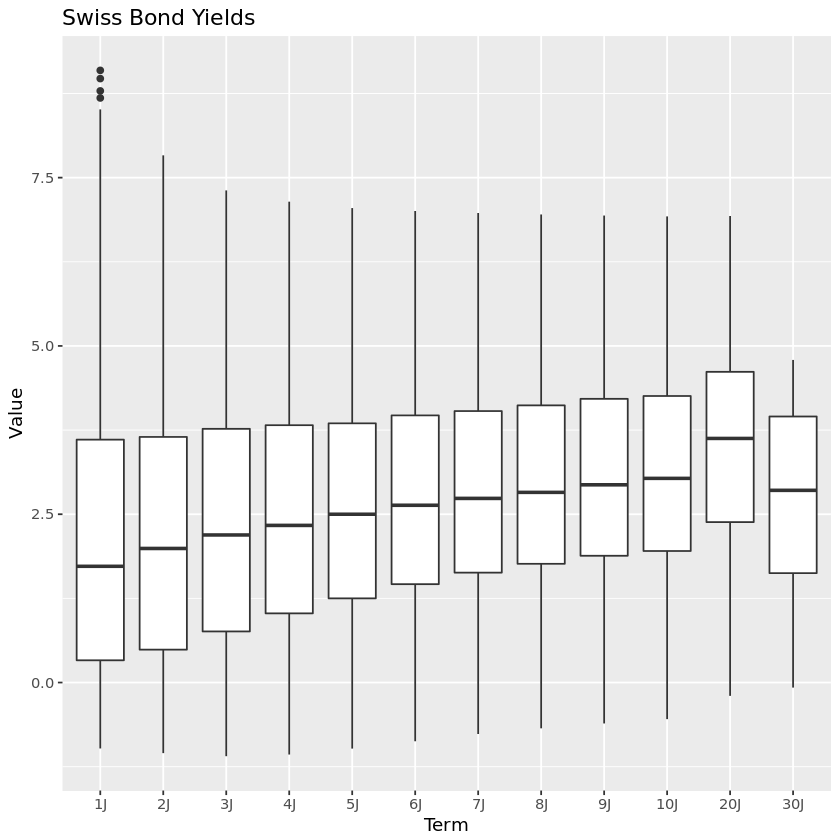

In [7]:
ggplot(data = df, mapping = aes(x = D0, y = Value)) + 
    geom_boxplot() + 
    scale_x_discrete("Term", limits=c("1J", "2J", "3J", "4J", "5J", "6J", "7J", "8J", "9J", "10J", "20J", "30J")) + 
    labs(title="Swiss Bond Yields")

# Scatterplots

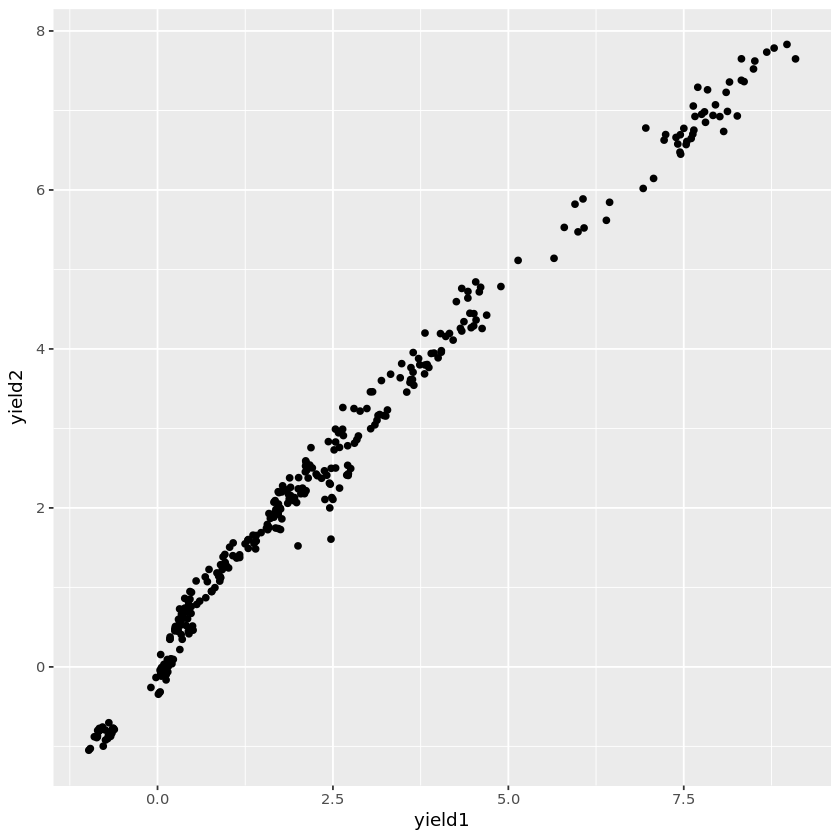

In [8]:
tdf = spread(df, D0, Value)
tdf = tdf[, c('1J', '2J')]
colnames(tdf)[colnames(tdf)=="1J"] <- "yield1"
colnames(tdf)[colnames(tdf)=="2J"] <- "yield2"
ggplot(data = tdf) + geom_point(mapping = aes(x=yield1, y=yield2))

# Bar Charts

`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


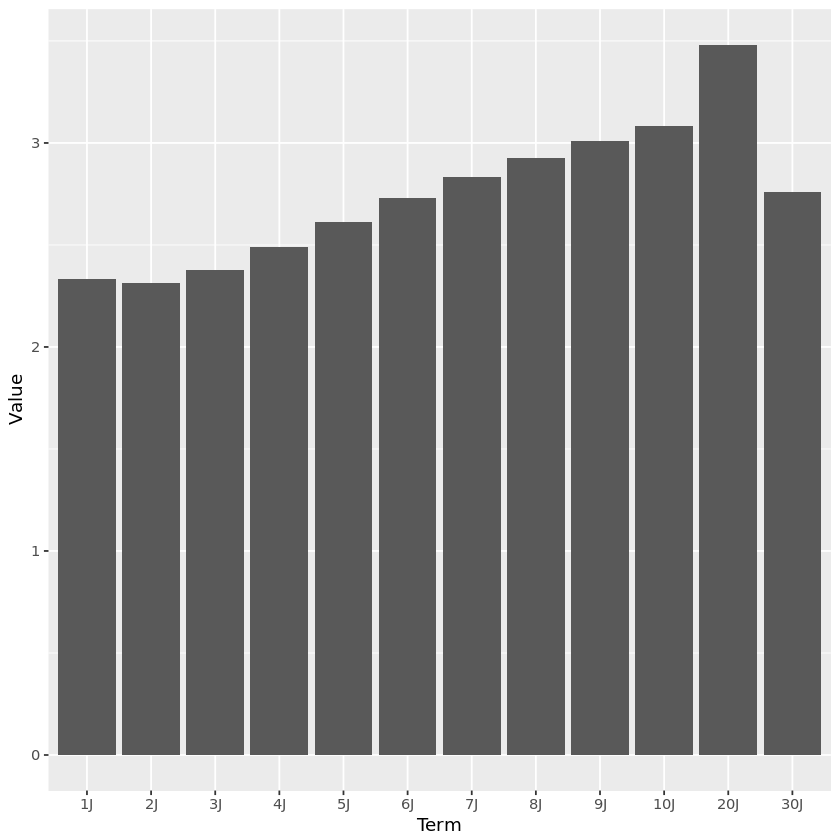

In [9]:
tdf = df %>%
     group_by(D0) %>%
     summarise_each(funs(mean(., na.rm = TRUE)))
ggplot(data = tdf, mapping = aes(x=D0, y=Value)) + 
    geom_col() +
    scale_x_discrete("Term", limits=c("1J", "2J", "3J", "4J", "5J", "6J", "7J", "8J", "9J", "10J", "20J", "30J"))

`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


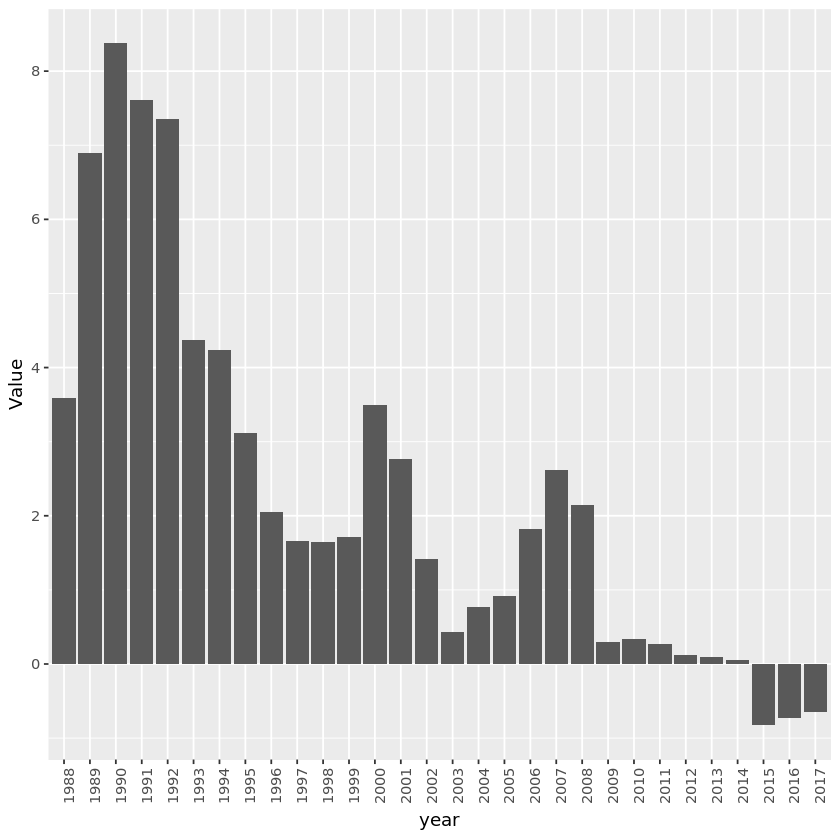

In [10]:
tdf = filter(df, D0 == '1J')
date_year = function(x) substr(x[1], 0, 4)
tdf$year = apply(tdf, 1, date_year)
tdf = tdf[,c('Date', 'year', 'Value')]
tdf = tdf %>%
     group_by(year) %>%
     summarise_each(funs(mean(., na.rm = TRUE)))
ggplot(data = tdf, mapping = aes(x=year, y=Value)) + 
    geom_col() +
    theme(axis.text.x  = element_text(angle=90))